In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Polynomial Curve Fitting

## Data Preparation 

In [2]:
def create_toy_data(f, sample_size, std=0.25, noise=True):
    x = np.linspace(0, 1, sample_size)
    if noise:
        y = f(x) + np.random.normal(scale=std, size=x.shape)
    else:
        y = f(x)            
    return x, y

In [3]:
def f(x):
    return np.sin(2 * np.pi * x)

In [4]:
x_train, y_train = create_toy_data(f, 10)
x_test , y_test  = create_toy_data(f, 100)
x_exact, y_exact = create_toy_data(f, 100, noise=False)

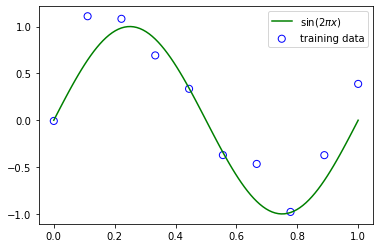

In [5]:
plt.scatter(x_train, y_train, facecolor='none', edgecolors='b', s=50, label='training data')
plt.plot(x_exact, y_exact, c='g', label='$\sin(2\pi x)$')
plt.legend()
plt.show()

## Regression 

In [6]:
class Regression(object):
    """Base class for regression
    """
    pass   

## Linear Regression

In [7]:
class LinearRegression(Regression):
    """Linear Regression Model
    y = X @ w
    """        
    def fit(self, X, y):
        """performe least square fitting
        
        Params
        ======
        X: (N, D) np.ndarray
            Polynomial feature
        y: (N,) np.ndarray
            Target
        """
        self.w = np.linalg.pinv(X) @ y
    
    def predict(self, X):
        """make prediction given input
        
        Params
        ======
        X: (N, D) np.ndarray
        
        Returns
        =======
        y: (N,) np.ndarray
            prediction of each sample
        """
        y = X @ self.w
        return y

## Polynomial Feature

In [8]:
import itertools
import functools

class PolynormialFeature(object):
    """Polynomial features
    transforms input array with polynomial feature
    
    Examples
    ========
    Example 1
    ---------
    x = np.array([a, b])
    y = PolynormialFeature(degree=2).transform(x)
    y = [[1, a, a^2, a^3]
         [1, b, b^2, b^3]]
    
    Example 2
    ---------
    x = np.array([[a, b], 
                  [c, d]])     
    y = PolynormialFeature(degree=2).transform(x)
    y = [[1, a, b, a^2, a*b, b^2],
         [1, c, d, c^2, c*d, d^2]]    
    """
    def __init__(self, degree=2):
        """construct polynomial features
        
        Params
        ======
        degree: int
            degree of polynomials
        """
        if not isinstance(degree, int):
            raise TypeError("degree should be int")
        self.degree = degree
        
    def transform(self, x):
        """transforms input array with polynomial features
        
        Params
        ======
        x: (sample_size, n) np.ndarray
            input array
            
        Returns
        =======
        output: (sample_size, C_{n+d}^d)
        """
        if x.ndim == 1:
            x = x[:, None]
        x_t = x.transpose()
        features = [np.ones(len(x))]
        for d in range(1, self.degree + 1):
            for item in itertools.combinations_with_replacement(x_t, d):
                features.append(functools.reduce(lambda x, y: x * y, item))
        return np.asarray(features).transpose()                    

In [9]:
x = np.array([1, 2])
feature = PolynormialFeature(2).transform(x)
print(feature)

[[1. 1. 1.]
 [1. 2. 4.]]


In [10]:
x = np.array([[1, 2],[2, 3]])
feature = PolynormialFeature(2).transform(x)
print(feature)

[[1. 1. 2. 1. 2. 4.]
 [1. 2. 3. 4. 6. 9.]]


## Curve Fitting

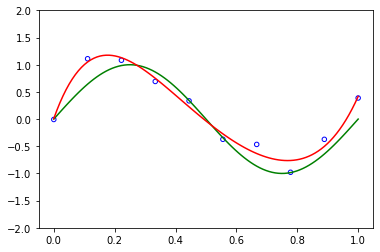

In [15]:
feature = PolynormialFeature(5)
X_train = feature.transform(x_train)
X_test  = feature.transform(x_test)
model = LinearRegression()
model.fit(X_train, y_train)
y = model.predict(X_test)
    
plt.scatter(x_train, y_train, facecolor='none', edgecolor='b', s=20, label='training_data')
plt.plot(x_exact, y_exact, c='g', label='$\sin(2\pi x)$')
plt.plot(x_test , y      , c='r', label='fitting')
plt.ylim(-2, 2)
# plt.legend(bbox_to_anchor=(1.05,0.64), loc=2)
plt.show()

[0.14106753]
[ 0.72219363 -1.16225219]
[-1.01213371e-02  2.09656543e+01 -1.32948735e+02  3.86410436e+02
 -6.21143846e+02  5.05227196e+02 -1.58103504e+02]
[-7.51070564e-03 -7.27354774e+01  2.06656337e+03 -1.98624534e+04
  9.68982185e+04 -2.72119657e+05  4.57721230e+05 -4.54945952e+05
  2.46144116e+05 -5.58289336e+04]


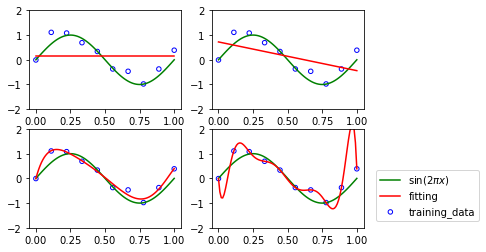

In [16]:
for i, degree in enumerate([0, 1, 6, 9]):
    plt.subplot(2, 2, i+1)
    
    feature = PolynormialFeature(degree)
    X_train = feature.transform(x_train)
    X_test  = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    print(model.w)
    
    plt.scatter(x_train, y_train, facecolor='none', edgecolor='b', s=20, label='training_data')
    plt.plot(x_exact, y_exact, c='g', label='$\sin(2\pi x)$')
    plt.plot(x_test , y      , c='r', label='fitting')
    plt.ylim(-2, 2)
plt.legend(bbox_to_anchor=(1.05,0.64), loc=2)
plt.show()

## Training and testing error

In [17]:
def rmse(a, b):
    """Rooted Mean Squared Error
    
    Params:
    ======
    a: (n,) np.ndarray
    b: (n,) np.ndarray
    """
    return np.sqrt(np.mean(np.square(a - b)))

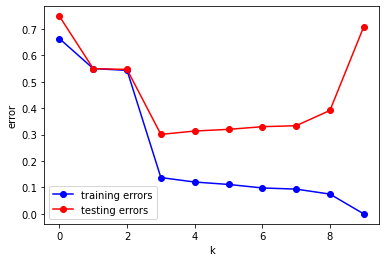

In [20]:
errors_train = []
errors_test  = []

for i in range(10):
    feature = PolynormialFeature(i)
    X_train = feature.transform(x_train)
    X_test  = feature.transform(x_test)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y = model.predict(X_test)
    errors_train.append(rmse(model.predict(X_train), y_train))
    errors_test.append (rmse(model.predict(X_test ), y_test ))
    
plt.plot(errors_train, 'o-', c='b', label='training errors')
plt.plot(errors_test , 'o-', c='r', label='testing errors')
plt.xlabel('k')
plt.ylabel('error')
plt.legend()


plt.show()

## Ridge Regression - Regularization

In [21]:
class RidgeRegression(Regression):
    """Ridge regression
    w^* = argmin \|t - X @ w\|^2 + alpha * \|w\|^2
    """
    def __init__(self, alpha=1.):
        self.alpha = alpha
        
    def fit(self, X, y):
        """MAP estimation of parameter
        
        Params
        ======
        X: (N, D) np.ndarray
            Polynomial features
        y: (N,) np.ndarray
            Target
        """
        eye = np.eye(X.shape[1])
        self.w = np.linalg.solve(self.alpha * eye + X.T @ X, X.T @ y)    
        
    def predict(self, X):
        """make prediction given input
        
        Params
        ======
        X: (N, D) np.ndarray
            samples to predict their output
        
        Returns
        =======
        y: (N,) np.ndarray
            prediction of each sample
        """
        y = X @ self.w
        return y

[  0.32689055   5.28489803 -11.66628454  -2.57707244   2.87395291
   4.33619819   3.58169661   1.7596656   -0.52564945  -2.97177973]


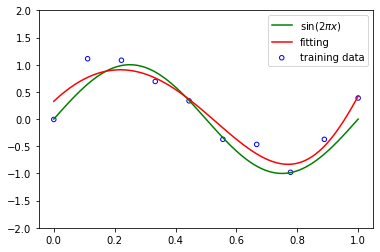

In [22]:
feature = PolynormialFeature(9)
X_train = feature.transform(x_train)
X_test  = feature.transform(x_test)

model = RidgeRegression(alpha=1e-3)
model.fit(X_train, y_train)
y = model.predict(X_test)
print(model.w)

plt.scatter(x_train, y_train, fc='none', ec='b', s=20, label='training data')
plt.plot(x_exact, y_exact, c='g', label='$\sin(2\pi x)$')
plt.plot(x_test , y, c='r', label='fitting')
plt.ylim(-2, 2)
plt.legend()
plt.show()